In [1]:
""" 
file url
https://s3-eu-west-1.amazonaws.com/course.oc-static.com/courses/4452741/P4_fr.pdf

Contexte

Vous avez une idée de start-up ! Vous souhaitez vendre des cartes de vœux pour les anniversaires... Ca parait simple, mais attention, il y a un twist ! Vous voulez faire un type de cartes de vœux pour le jour de la semaine de naissance du destinataire. Vous aurez ainsi 7 types de cartes différents.

Vous aimeriez prévoir la quantité de cartes à créer. Malheureusement, vous ne savez pas quelle quantité commander pour chaque jour. Mais vous avez accès aux données de naissance aux États-Unis dans ce fichier (eh oui, vous partez directement à l'international !)

Pour mieux comprendre quelles cartes créer, vous allez donc étudier les jours de naissance des habitants des états-unis.

Information
Cette tâche implique un peu de nettoyage de données, et un peu d’algèbre linéaire. Vous aurez certainement besoin d'un peu de traitement avec la fonction  to_datetime  pour transformer les données en objets  datetime  (et un peu de connaissance en Python pour comprendre ce que c'est.

Consigne

1. Vous allez livrer un graphique avec trois courbes qui représentent le nombre de naissances pour chaque jour de la semaine pour les décennies 1960, 1970 et 1980.

2. Cette tâche implique un peu de nettoyage de données, et un peu d’algèbre linéaire. Vous aurez certainement besoin d'un peu de traitement avec la fonction  to_datetime  pour transformer les données en objets  datetime  (et un peu de connaissance en Python pour comprendre ce que c'est). Pour cet exercice, faites attention à ces points :

    1. Nettoyage de la colonne births.
    2. Conversion des colonnes day, month et year en datatime.
    3. Conversion en jour de semaine.
    4. L'agrégation doit être faite grâce à librairies Pandas. 
"""

" \nfile url\nhttps://s3-eu-west-1.amazonaws.com/course.oc-static.com/courses/4452741/P4_fr.pdf\n\nContexte\n\nVous avez une idée de start-up ! Vous souhaitez vendre des cartes de vœux pour les anniversaires... Ca parait simple, mais attention, il y a un twist ! Vous voulez faire un type de cartes de vœux pour le jour de la semaine de naissance du destinataire. Vous aurez ainsi 7 types de cartes différents.\n\nVous aimeriez prévoir la quantité de cartes à créer. Malheureusement, vous ne savez pas quelle quantité commander pour chaque jour. Mais vous avez accès aux données de naissance aux États-Unis dans ce fichier (eh oui, vous partez directement à l'international !)\n\nPour mieux comprendre quelles cartes créer, vous allez donc étudier les jours de naissance des habitants des états-unis.\n\nInformation\nCette tâche implique un peu de nettoyage de données, et un peu d’algèbre linéaire. Vous aurez certainement besoin d'un peu de traitement avec la fonction  to_datetime  pour transforme

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
# Reading the file
births  = pd.read_csv("births.csv")
print(births)

       year  month  day gender  births
0      1969      1  1.0      F    4046
1      1969      1  1.0      M    4440
2      1969      1  2.0      F    4454
3      1969      1  2.0      M    4548
4      1969      1  3.0      F    4548
...     ...    ...  ...    ...     ...
15542  2008     10  NaN      M  183219
15543  2008     11  NaN      F  158939
15544  2008     11  NaN      M  165468
15545  2008     12  NaN      F  173215
15546  2008     12  NaN      M  181235

[15547 rows x 5 columns]


In [8]:
# Generate descriptive statistics.
births.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [12]:
# Return the first n rows
# births.head(n=10)
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [21]:
# Generating/adding decades to the dataframe
births["decade"] = (births["year"] // 10) * 10
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


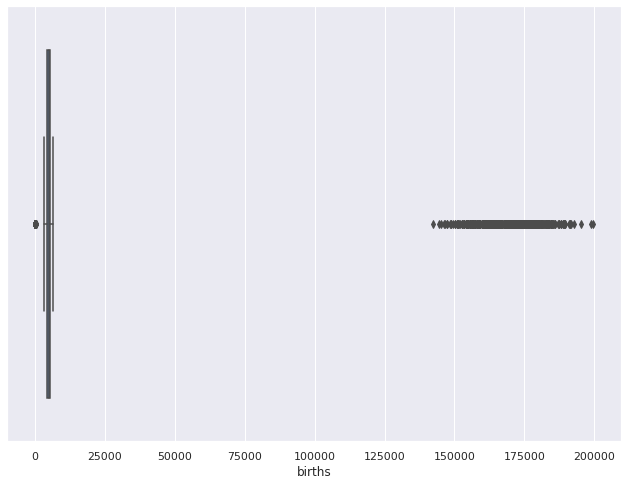

In [25]:
fig = plt.figure(figsize=(11,8))
fig = sns.boxplot(x=births.births)

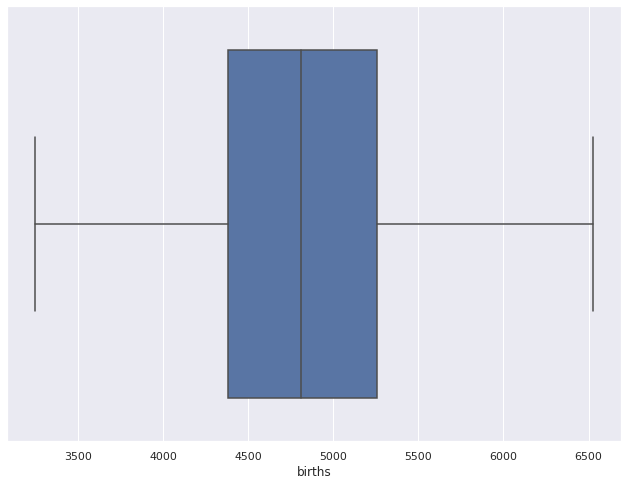

In [35]:
births = births.query('(births > 1000) & (births < 100000)')
fig = plt.figure(figsize=(11,8))
fig = sns.boxplot(x=births.births)


In [36]:
births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 15066
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    14610 non-null  int64  
 1   month   14610 non-null  int64  
 2   day     14610 non-null  float64
 3   gender  14610 non-null  object 
 4   births  14610 non-null  int64  
 5   decade  14610 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 799.0+ KB


In [39]:
for field in ["day", "month", "year"]:
    births[field] = births[field].astype(int)

In [46]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year + 100 * births.month +
                                births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

In [49]:
 births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


<ipython-input-51-24cc9cf12be6>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


<Figure size 792x576 with 0 Axes>

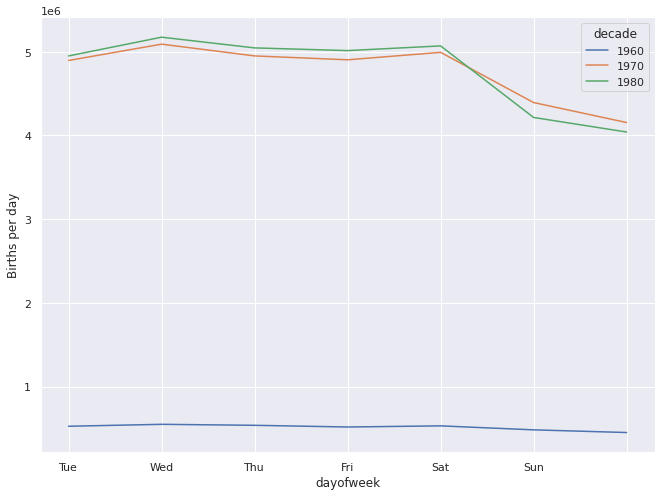

In [51]:
fig = plt.figure(figsize=(11,8))
births_per_day = births.pivot_table("births", index="dayofweek", columns="decade", aggfunc="sum")
births_per_day.plot(figsize=(11,8))
plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Births per day');
